In [3]:
import pandas as pd
df=pd.read_csv("Advertising.csv")
df.iloc[:1:len(df)]
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


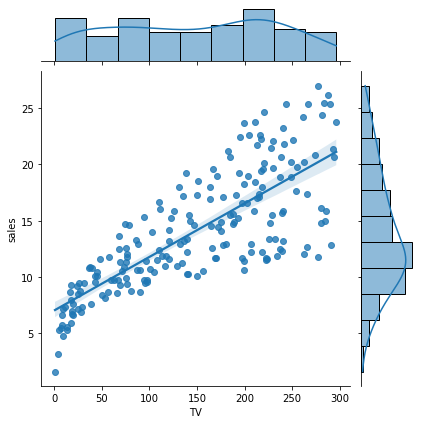

In [7]:
import seaborn as sbn 
sbn.jointplot(x="TV", y="sales",data=df, kind="reg");

In [8]:
from sklearn.linear_model import LinearRegression

In [23]:
X=df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [24]:
y= df[["sales"]]
y.shape

(200, 1)

In [30]:
reg=LinearRegression()

In [31]:
model=reg.fit(X,y)

In [32]:
model

LinearRegression()

In [33]:
model.intercept_

array([7.03259355])

In [34]:
model.coef_

array([[0.04753664]])

In [35]:
# rKare
model.score(X,y)

0.611875050850071

## Tahmin

In [36]:
import matplotlib.pyplot as plt

C:\Users\sevva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 28.27)

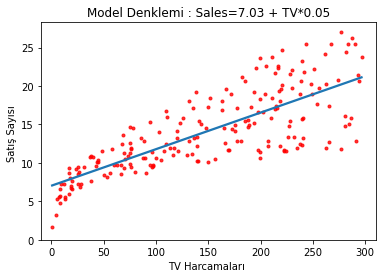

In [37]:
g=sbn.regplot(df["TV"], df["sales"],ci=None, scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi : Sales=7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı ")
g.set_xlabel("TV Harcamaları ")
plt.xlim(-10,310)
plt.ylim(bottom=0)

 Sales=7.03 + TV*0.05 

In [39]:
model.predict([[165]])

C:\Users\sevva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [40]:
new_data=[[5],[15],[30]]

In [41]:
model.predict(new_data)

C:\Users\sevva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Artıklar

#### MSE: Hata kareler Ort
#### RMSE.Hata kareler ort. karekökü

In [44]:
 y.head(10)

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [43]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [45]:
real_y=y[0:10]

In [46]:
predict_y=pd.DataFrame(model.predict(X)[0:10])

In [47]:
hata=pd.concat([real_y,predict_y],axis=1)

In [49]:
hata.columns=["Real","Predict"]
hata

,Real,Predict
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [50]:
hata["loss"]=hata["Real"]- hata["Predict"]
hata

,Real,Predict,loss
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [51]:
hata["Loss^2"]=hata["loss"]**2
hata

,Real,Predict,loss,Loss^2
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [53]:
#Hata kareler ortalaması 
import numpy as np
np.mean(hata["Loss^2"])

9.290350329638105